In [1]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt

In [2]:
#participant file
participant_file = os.path.join(os.pardir,"data","DS1_Intern_20170101.csv")
participant_df = pd.read_csv(participant_file, dtype={'PostalCode': str})

In [3]:
participant_df.head()

,EncNRIC,PostalCode,Corporate_Organization,DeviceBrand,DeviceModel,Signup_mode,Signup_roadshow,Setting,Current_Wearable_Source,Profile_Create_Date,Collected_Date,First_Paired_Date_in_S2,Reg_NSC2_Date
0,+++dRFewDCP35Ewg/Hxs0A==,400336,NaN,samsung,SM-N9005,1 App,NaN,NaN,HPBWearable_Apex,18NOV16:17:03:10,18NOV16:00:00:00,19NOV16:16:45:28,18/11/2016
1,++/KfZFlfVuQNZJvDuDafQ==,546183,NaN,KIOSK,"iPad4,2",2 EO App,NaN,NaN,HPBWearable,30OCT16:12:36:26,30OCT16:00:00:00,30OCT16:14:59:38,30/10/2016
2,++08DjepMTLJ7yMy6b8tOg==,578345,NaN,apple,"iPhone6,2",1 App,NaN,NaN,NaN,11OCT16:16:56:02,29OCT16:00:00:00,NaN,29/10/2016
3,++0kjCLiS480sqIsQ/3GwA==,650420,NaN,samsung,SM-N910G,1 App,NaN,NaN,HPBWearable_Apex,08DEC16:16:30:08,08DEC16:00:00:00,09DEC16:00:46:05,08/12/2016
4,++0znnPR1z8lmQnhF2Sfpg==,460059,NaN,KIOSK,"iPad4,2",2 EO App,NaN,NaN,HPBWearable,15DEC16:20:02:12,15DEC16:00:00:00,15DEC16:20:10:54,15/12/2016


In [4]:
devicebrand_df = participant_df[['DeviceBrand','EncNRIC']].groupby('DeviceBrand').agg('count')
filtered_devicebrand_df = devicebrand_df.loc[devicebrand_df['EncNRIC'] > 20]
sorted_filtered_devicebrand_df = filtered_devicebrand_df.sort_values(by='EncNRIC',ascending=False)

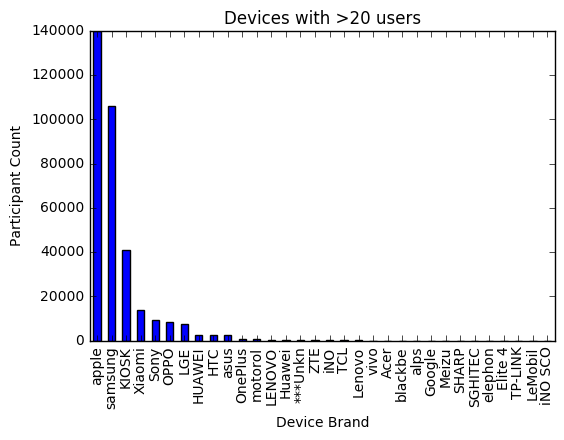

In [5]:
sorted_filtered_devicebrand_df.plot(kind='bar', legend=None)
plt.xlabel('Device Brand')
plt.ylabel('Participant Count')
plt.title('Devices with >20 users')

plt.show()

In [6]:
def onemap_geocode(postalcode):
    header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    onemap_request = 'https://developers.onemap.sg/commonapi/search?searchVal=' + str(postalcode) + '&returnGeom=Y&getAddrDetails=N'
    print(onemap_request)
    response = requests.get(onemap_request)
    print('response obtained')
    response_json = response.json()
    lat = response_json['results'][0]['LATITUDE']
    lon = response_json['results'][0]['LONGITUDE']
    
    return lat + ', ' + lon

In [7]:
geocode_df = participant_df.ix[:10,:2]
geocode_df

,EncNRIC,PostalCode
0,+++dRFewDCP35Ewg/Hxs0A==,400336
1,++/KfZFlfVuQNZJvDuDafQ==,546183
2,++08DjepMTLJ7yMy6b8tOg==,578345
3,++0kjCLiS480sqIsQ/3GwA==,650420
4,++0znnPR1z8lmQnhF2Sfpg==,460059
5,++1dnjM5j+FxGDv67NkzHQ==,NaN
6,++2O1MJu2/uGAYpnA6IXBA==,466507
7,++2b52HGYQoZWfUx5UARJA==,357984
8,++5VrZG2Zt+rwgJFqv3V3Q==,760776
9,++5mkKs7u+tkcSHgaBGIZQ==,560129


In [9]:
onemap_geocode(178880)

https://developers.onemap.sg/commonapi/search?searchVal=178880&returnGeom=Y&getAddrDetails=N


ConnectionError: HTTPSConnectionPool(host='developers.onemap.sg', port=443): Max retries exceeded with url: /commonapi/search?searchVal=178880&returnGeom=Y&getAddrDetails=N (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x0000005CCDE455F8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))